#### Q1. Explain the difference between simple linear regression and multiple linear regression. Provide an example of each.

Ans.

**Simple Linear Regression:**
- Definition: A regression model with one independent variable (predictor) and one dependent variable (response).
- Equation: Y = b0 + b1X + ε  
- Complexity: Simple and easy to interpret.  
- Use case: Used when one factor strongly influences the outcome.

**Multiple Linear Regression:**
- Definition: A regression model with two or more independent variables (predictors) and one dependent variable.
- Equation: Y = b0 + b1X1 + b2X2 +b3X3 ..... +bnXn +ε  
- Complexity: More complex but provides better predictions.
- Use case: Used when multiple factors influence the outcome.

---

#### Q2. Discuss the assumptions of linear regression. How can you check whether these assumptions hold in a given dataset?

Ans.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True).frame

X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']]  # Independent variables
y = data['MedHouseVal']  # Dependent variable

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

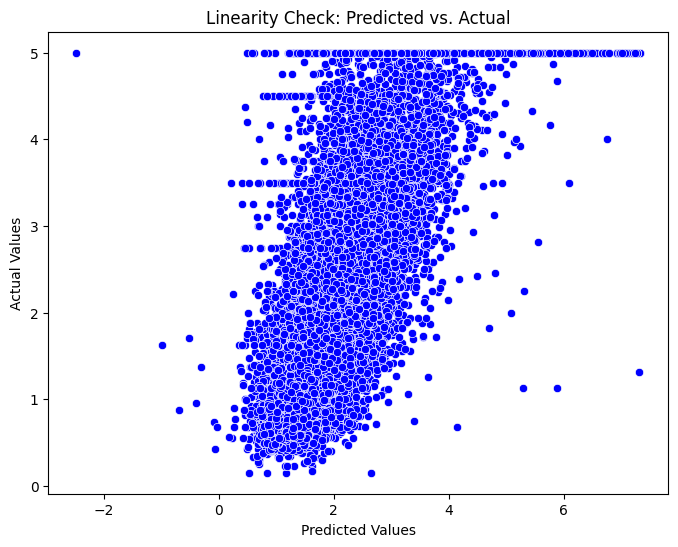

In [3]:
y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=y, c="b")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Linearity Check: Predicted vs. Actual")
plt.show()


In [4]:
dw_statistic = durbin_watson(model.resid)
print(f"Durbin-Watson Statistic: {dw_statistic}")

Durbin-Watson Statistic: 0.8069943083070532


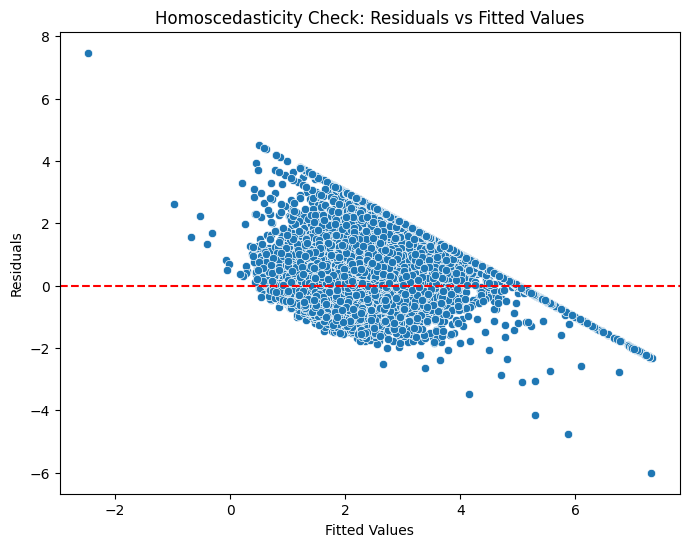

Breusch-Pagan Test p-value: 3.2840142527075464e-138


In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Fitted Values")
plt.show()

bp_test = het_breuschpagan(model.resid, X)
print(f"Breusch-Pagan Test p-value: {bp_test[1]}")


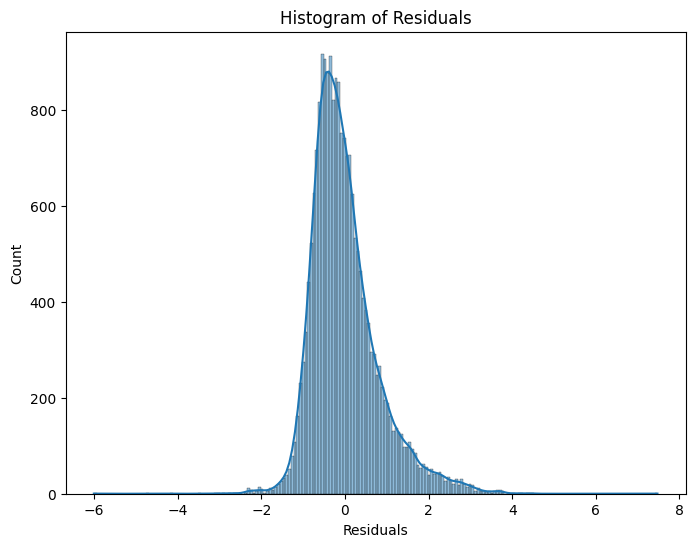

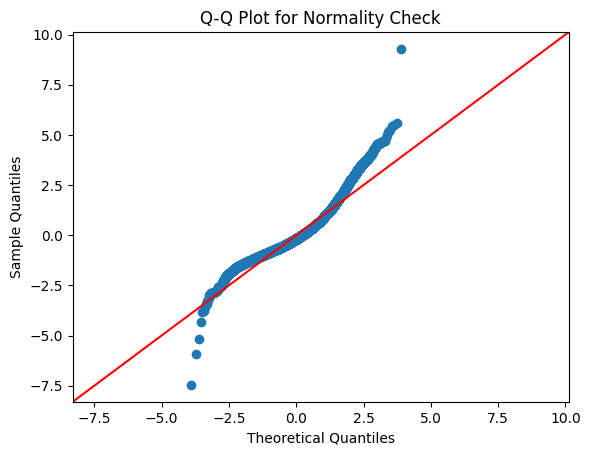

Shapiro-Wilk Test p-value: 0.0


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(model.resid, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

sm.qqplot(model.resid, line="45", fit=True)
plt.title("Q-Q Plot for Normality Check")
plt.show()

shapiro_test = stats.shapiro(model.resid)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")


In [7]:
# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


    Feature        VIF
0     const  15.406052
1    MedInc   1.126350
2  HouseAge   1.029877
3  AveRooms   1.136638
4  AveOccup   1.000690


---

#### Q3. How do you interpret the slope and intercept in a linear regression model? Provide an example using a real-world scenario.

Ans.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [9]:
# Sample dataset: House Prices vs. Square Footage
np.random.seed(42)
square_footage = np.random.randint(800, 4000, 50)  # House sizes in sqft
price = 50000 + 150 * square_footage + np.random.randint(-20000, 20000, 50)  # Price in $

df = pd.DataFrame({'SquareFootage': square_footage, 'Price': price})

print(df.head())

   SquareFootage   Price
0           3974  640602
1           1660  300777
2           2094  354727
3           1930  328292
4           1895  322683


In [10]:
X = df[['SquareFootage']]
y = df['Price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

intercept, slope = model.params
print(f"Intercept (b0): {intercept}")
print(f"Slope (b1): {slope}")

Intercept (b0): 49706.90677339761
Slope (b1): 148.81829087273172


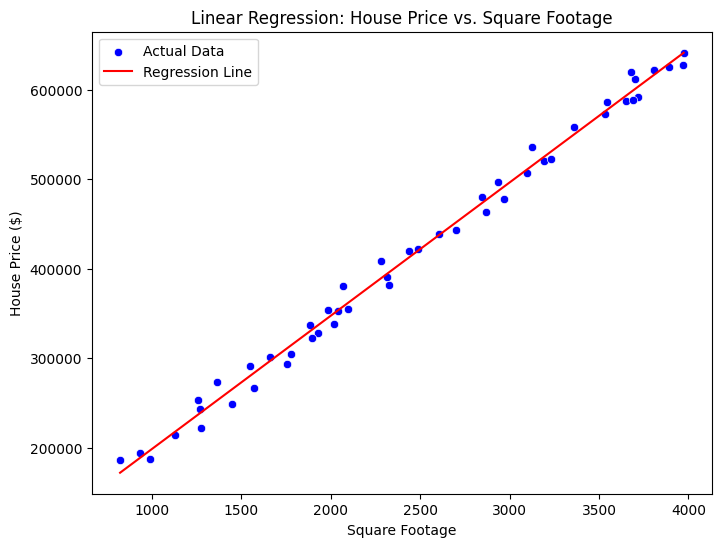

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['SquareFootage'], y=df['Price'], label="Actual Data", color='blue')

x_range = np.linspace(min(df['SquareFootage']), max(df['SquareFootage']), 100)
y_pred = intercept + slope * x_range
plt.plot(x_range, y_pred, color='red', label="Regression Line")

plt.xlabel("Square Footage")
plt.ylabel("House Price ($)")
plt.title("Linear Regression: House Price vs. Square Footage")
plt.legend()
plt.show()

---

#### Q4. Explain the concept of gradient descent. How is it used in machine learning?

Ans.

**Gradient Descent:**
- Gradient Descent is an optimization algorithm used to find the minimum of a function by iteratively updating its parameters in the direction of the negative gradient.
- In Machine Learning, it is commonly used to minimize the loss function and improve the model’s performance.

**Gradient Descent in Machine Learning:**
- Linear Regression (minimizing Mean Squared Error)
- Logistic Regression (minimizing Log Loss)
- Neural Networks (optimizing weights using Backpropagation)

---

#### Q5. Describe the multiple linear regression model. How does it differ from simple linear regression?

Ans.

**Multiple Linear Regression:**
- Definition: A regression model with two or more independent variables (predictors) and one dependent variable.
- Equation: Y = b0 + b1X1 + b2X2 +b3X3 ..... +bnXn +ε  
- Complexity: More complex but provides better predictions.
- Use case: Used when multiple factors influence the outcome.

**Simple Linear Regression:**
- Definition: A regression model with one independent variable (predictor) and one dependent variable (response).
- Equation: Y = b0 + b1X + ε  
- Complexity: Simple and easy to interpret.  
- Use case: Used when one factor strongly influences the outcome.

---

#### Q6. Explain the concept of multicollinearity in multiple linear regression. How can you detect and address this issue?

Ans.

**Multicollinearity:**
- Multicollinearity occurs when two or more independent variables in a multiple linear regression model are highly correlated, meaning they provide redundant information.

**Challenges:**
- It makes coefficients unstable and difficult to interpret.
- Small changes in data can cause large variations in estimated coefficients.
- It reduces the model’s ability to determine the true effect of each predictor.

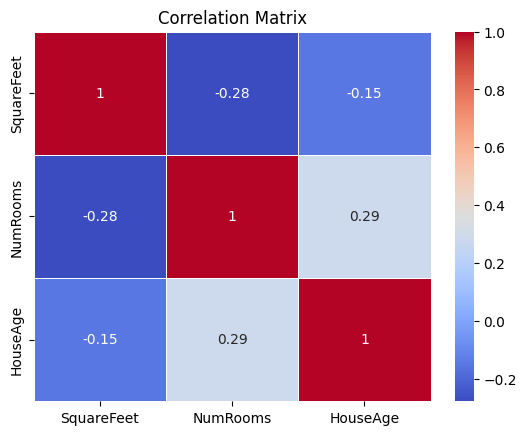

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
df = pd.DataFrame({
    'SquareFeet': [1000, 1500, 20000, 2500, 3000],
    'NumRooms': [2, 8, 4, 7, 6],
    'HouseAge': [5, 17, 15, 20, 85]
})

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

---

#### Q7. Describe the polynomial regression model. How is it different from linear regression?

Ans.

**Polynomial Regression:**
- Polynomial Regression is a type of regression analysis that models the relationship between the dependent variable (Y) and the independent variable (X) as an n-th degree polynomial.
- It is used when the data exhibits a non-linear relationship

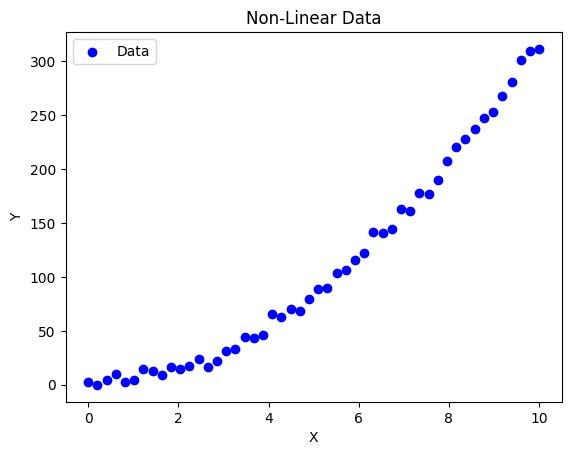

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate dataset
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)  # 50 data points
y = 3 * X**2 + 2 * X + np.random.randn(50, 1) * 5  # Quadratic function with noise

plt.scatter(X, y, color="blue", label="Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-Linear Data")
plt.legend()
plt.show()

---

#### Q8. What are the advantages and disadvantages of polynomial regression compared to linear regression? In what situations would you prefer to use polynomial regression?

Ans.

**Advantages of Polynomial Regression:**
- Captures Non-Linearity: Unlike linear regression, it can model curved relationships in data.
- Better for Complex Data: Works well when the relationship between variables is not a straight line.
- Flexible Model: Increasing the polynomial degree allows better approximation of trends.

**Disadvantages of Polynomial Regression:**
- Overfitting Risk: High-degree polynomials may fit the training data too well but generalize poorly to new data.
- Computationally Expensive: More polynomial terms increase model complexity.
- Difficult to Interpret: Unlike linear regression, polynomial coefficients don’t have a straightforward interpretation.

Scenario 1: Use Linear Regression:  
- Predicting house prices based on square footage (relationship is mostly linear).

Scenario 2: Use Polynomial Regression:  
- Predicting population growth or disease spread, where the rate of change accelerates or slows down over time.